### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import pandasql as ps
from pandasql import sqldf
import ast
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### Importing data

In [2]:
merged_dataset = pd.read_csv(r"./new_dataset.csv")

# Machine Learning

## Creating ML dataset

In [3]:
dataset_final = merged_dataset.loc[:,['p_id', 'name', 'price', 'colour', 'brand', 'ratingCount', 'avg_rating',
       'Occasion', 'Print_Pattern_Type', 'Sustainable', 'Knit_or_Woven',
       'Fabric', 'Fabric_Purity', 'brandID']]

## Pre-processing

In [4]:
le = preprocessing.LabelEncoder()

for i in dataset_final.columns:
        if dataset_final[i].dtype == object:
            dataset_final[i] = le.fit_transform(dataset_final[i])
        else:
            pass

In [5]:
dataset_final

,p_id,name,price,colour,brand,ratingCount,avg_rating,Occasion,Print_Pattern_Type,Sustainable,Knit_or_Woven,Fabric,Fabric_Purity,brandID
0,1518329.0,2986,899.0,47,220,1321,4.548827,1,24,0,2,7,2,221
1,5829334.0,9059,1199.0,27,701,5462,4.313255,0,43,0,2,7,2,702
2,10340119.0,4865,5799.0,33,362,145,4.068966,1,22,0,2,8,2,363
3,10856380.0,9330,1499.0,2,719,9124,4.147523,0,43,0,3,7,2,720
4,12384822.0,5811,1999.0,2,445,12260,4.078467,0,43,0,2,7,2,446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14263,17029604.0,11238,3999.0,34,829,183,4.101193,3,24,0,3,20,2,830
14264,17600212.0,5758,2050.0,3,438,183,4.101193,0,37,0,2,7,2,439
14265,18159266.0,5655,1659.0,17,422,183,4.101193,11,24,0,3,41,2,423
14266,18921114.0,4838,2399.0,36,361,183,4.101193,0,24,0,3,71,2,362


In [6]:
dataset_final.columns

Index(['p_id', 'name', 'price', 'colour', 'brand', 'ratingCount', 'avg_rating',
       'Occasion', 'Print_Pattern_Type', 'Sustainable', 'Knit_or_Woven',
       'Fabric', 'Fabric_Purity', 'brandID'],
      dtype='object')

## Regression Modelling

>Selecting x & y variables

In [7]:
x_regression = dataset_final.loc[:,['p_id', 'colour', 'price', 'name','ratingCount',
       'Occasion', 'Print_Pattern_Type', 'Sustainable', 'Knit_or_Woven',
       'Fabric', 'Fabric_Purity', 'avg_rating']]

In [8]:
y_regression = dataset_final.loc[:,['brandID']]

>Creating training & testing datasets

In [9]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_regression, y_regression, test_size=0.25, random_state=23)

print("Your independent training dataset contains ", x_reg_train.shape, " rows and columns.")
print("Your independent testing dataset contains ", x_reg_test.shape, " rows and columns.")
print("Your dependent training dataset contains ", y_reg_train.shape, " rows and columns.")
print("Your dependent testing dataset contains ", y_reg_test.shape, " rows and columns.")

Your independent training dataset contains  (10701, 12)  rows and columns.
Your independent testing dataset contains  (3567, 12)  rows and columns.
Your dependent training dataset contains  (10701, 1)  rows and columns.
Your dependent testing dataset contains  (3567, 1)  rows and columns.


### Linear Regression

>Training the model

In [10]:
LR = LinearRegression()

In [11]:
LR.fit(x_reg_train, y_reg_train)

LinearRegression()

>Testing the model

In [12]:
LR_predict = LR.predict(x_reg_test)
LR_predict

array([[ 369.81194354],
       [ 663.40689954],
       [  67.62706508],
       ...,
       [1009.42805467],
       [ 486.4517765 ],
       [ 173.86947236]])

### Bayesian Ridge Regression

In [13]:
BayRidge = BayesianRidge()
BayRidge.fit(x_reg_train, y_reg_train)

C:\Users\percy\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [14]:
BayRidge_predict = BayRidge.predict(x_reg_test)
BayRidge_predict

array([ 371.64465677,  662.99256617,   67.32255658, ..., 1008.77802888,
        487.08312897,  172.83417773])

### Comparing Error Values

In [15]:
print("Linear Regressor MAE: ", metrics.mean_absolute_error(y_reg_test, LR_predict))
print("Bayesian Ridge Regressor MAE: ", metrics.mean_absolute_error(y_reg_test, BayRidge_predict))

Linear Regressor MAE:  14.202331665926106
Bayesian Ridge Regressor MAE:  14.211143027777617


## Classification Modelling

### Choosing the x & y variables

> To check for brand

In [16]:
x_class_brand = dataset_final.loc[:,['p_id', 'name','avg_rating', 'colour', 'ratingCount',
       'Occasion', 'Print_Pattern_Type', 'Sustainable', 'Knit_or_Woven',
       'Fabric', 'Fabric_Purity', 'price']]

In [17]:
y_class_brand = dataset_final.loc[:,['brand']]

>To check for sustainability

In [18]:
x_class_sustain = dataset_final.loc[:,['p_id', 'brand','brandID', 'avg_rating', 'colour', 'ratingCount',
       'Occasion', 'Print_Pattern_Type', 'Knit_or_Woven',
       'Fabric', 'Fabric_Purity', 'price']]

In [19]:
y_class_sustain = dataset_final.loc[:,['Sustainable']]

### Creating training & testing datasets

> To check for brand

In [20]:
x_train_brand, x_test_brand, y_train_brand, y_test_brand = train_test_split(x_class_brand, y_class_brand, test_size=0.25, random_state=23)

print("Your independent training dataset contains ", x_train_brand.shape, " rows and columns.")
print("Your independent testing dataset contains ", x_test_brand.shape, " rows and columns.")
print("Your dependent training dataset contains ", y_train_brand.shape, " rows and columns.")
print("Your dependent testing dataset contains ", y_test_brand.shape, " rows and columns.")

Your independent training dataset contains  (10701, 12)  rows and columns.
Your independent testing dataset contains  (3567, 12)  rows and columns.
Your dependent training dataset contains  (10701, 1)  rows and columns.
Your dependent testing dataset contains  (3567, 1)  rows and columns.


>To check for sustainability

In [21]:
x_train_sustain, x_test_sustain, y_train_sustain, y_test_sustain = train_test_split(x_class_sustain, y_class_sustain, test_size=0.25, random_state=23)

print("Your independent training dataset contains ", x_train_sustain.shape, " rows and columns.")
print("Your independent testing dataset contains ", x_test_sustain.shape, " rows and columns.")
print("Your dependent training dataset contains ", y_train_sustain.shape, " rows and columns.")
print("Your dependent testing dataset contains ", y_test_sustain.shape, " rows and columns.")

Your independent training dataset contains  (10701, 12)  rows and columns.
Your independent testing dataset contains  (3567, 12)  rows and columns.
Your dependent training dataset contains  (10701, 1)  rows and columns.
Your dependent testing dataset contains  (3567, 1)  rows and columns.


### Random Forest Classifier for brand

In [22]:
rforest = RandomForestClassifier(n_estimators=60)
rforest.fit(x_train_brand, y_train_brand)

C:\Users\percy\AppData\Local\Temp\ipykernel_5848\1169656683.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(x_train_brand, y_train_brand)


RandomForestClassifier(n_estimators=60)

In [23]:
rforest_predict1 = rforest.predict(x_test_brand)

### Decision Tree Classifier for brand

In [24]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train_brand, y_train_brand)

DecisionTreeClassifier()

In [25]:
dtree_predict1 = dtree.predict(x_test_brand)

### Comparing Accuracy Scores

In [26]:
print("Random Forest Classifier Accuracy:", round((metrics.accuracy_score(y_test_brand, rforest_predict1))*100,2),"%")
print("Decision Classifier Accuracy:", round((metrics.accuracy_score(y_test_brand, dtree_predict1))*100,2),"%")

Random Forest Classifier Accuracy: 72.81 %
Decision Classifier Accuracy: 90.27 %


### Decision Tree Classifier for sustainability

In [27]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train_sustain, y_train_sustain)

DecisionTreeClassifier()

In [28]:
dtree_predict2 = dtree.predict(x_test_sustain)

### Random Forest Classifier for sustainability

In [29]:
rforest = RandomForestClassifier(n_estimators=60)
rforest.fit(x_train_sustain, y_train_sustain)

C:\Users\percy\AppData\Local\Temp\ipykernel_5848\123378999.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(x_train_sustain, y_train_sustain)


RandomForestClassifier(n_estimators=60)

In [30]:
rforest_predict2 = rforest.predict(x_test_sustain)

### Comparing Accuracy Scores

In [31]:
print("Random Forest Classifier Accuracy:", round((metrics.accuracy_score(y_test_sustain, rforest_predict2))*100,2),"%")
print("Decision Classifier Accuracy:", round((metrics.accuracy_score(y_test_sustain, dtree_predict2))*100,2),"%")

Random Forest Classifier Accuracy: 78.36 %
Decision Classifier Accuracy: 70.34 %


### Confusion matrices for Sustainability

In [38]:
merged_dataset['Sustainable'].unique()

array(['Regular', 'Sustainable'], dtype=object)

### Decision Tree 

In [33]:
dtree_cm=confusion_matrix(dtree_predict2, y_test_sustain)

In [34]:
dtree_cm_df= pd.DataFrame(dtree_cm, index=['Regular', 'Sustainable'],
                         columns=['Regular', 'Sustainable'])
print(dtree_cm_df)

                   Knitted and Woven  Woven  Knitted  Knit
Knitted and Woven                  0      0        1     9
Woven                              0    324       88   230
Knitted                            0     94      962   253
Knit                              12    147      224  1223


### Random Forest

In [35]:
rforest_cm=confusion_matrix(rforest_predict2, y_test_sustain)

In [36]:
rforest_cm_df= pd.DataFrame(rforest_cm, index=['Regular', 'Sustainable'],
                         columns=['Regular', 'Sustainable'])
print(rforest_cm_df)

                   Knitted and Woven  Woven  Knitted  Knit
Knitted and Woven                  0      0        0     3
Woven                              0    324       41    99
Knitted                            0     81     1038   180
Knit                              12    160      196  1433


## Visualising the confusion matrices

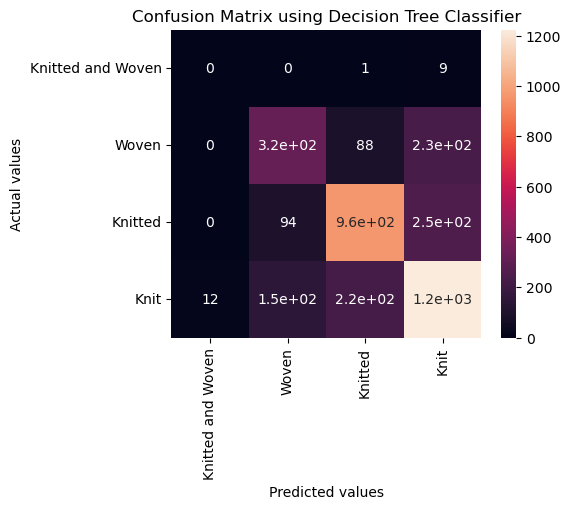

In [37]:
plt.figure(figsize=(5,4))
sns.heatmap(dtree_cm_df,annot=True)
plt.title('Confusion Matrix using Decision Tree Classifier')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()